<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Potencias </font> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('Data/numericos.csv')
df.head()

,0,1,2
0,0.255228,0.902346,0.733752
1,0.226339,0.925600,0.385178
2,0.205234,0.921390,0.547819
3,0.231553,0.885718,0.880428
4,0.185737,0.889161,0.953430


In [3]:
df.skew()

0    6.000314
1   -2.772736
2   -1.012379
dtype: float64

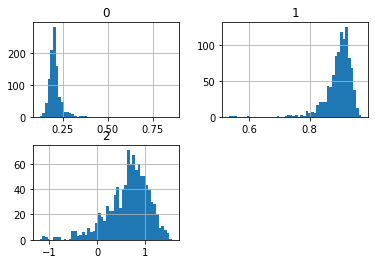

In [6]:
df.hist(bins=50);

In [7]:
# Compensando la variable '0'
 # Variable desplazada a 1
df_copia = df.copy()
x = df['0'] - df['0'].min() +1 #variable desplazada a 1

In [11]:
a = -11
df_copia['0'] = x**a
df_copia['0'].skew()

0.04181647238238833

In [12]:
# Compensando la variable '1'
x = df['1'] - df['1'].min()+1

In [17]:
a=17
df_copia['1']=x**a
df_copia['1'].skew()

-0.027448039332947635

In [19]:
# Compensando la variable '2'
x = df['2'] - df['2'].min()+1
a=3
df_copia['2']=x**a
df_copia['2'].skew()

0.03113961761990119

Aplicando una transformación de la forma
$$
x'=x^a,
$$
donde $x\in[1,\infty)$, obtuvimos los siguientes exponentes para cada variable

Variable|Sesgo original|$a$
--|--|--
'0'|6.0|-11
'1'|-2.77|17
'2'|-1.01|3

---

# Familia de transformaciones de potencia
$$
x'=\frac{x^\lambda-1}{\lambda},
$$
haciendo $\displaystyle\lim_{\lambda\rightarrow0}\frac{x^\lambda-1}{\lambda}$ se tiene
$$
x'=\ln(x).
$$

## Transformación Box-Cox
$$
x'=\left\{\begin{array}{lr}
\dfrac{x^\lambda-1}{\lambda} & \lambda\neq0\\
\ln(x) & \lambda=0
\end{array}\right.
$$

---
Uso de valores negativos para $x$:
$$
x'=\left\{
  \begin{array}{ll}
  \mathrm{sign}(x)\dfrac{(|x|+1)^\lambda-1}{\lambda},&\lambda\neq0\\
  \mathrm{sign}(x)\ln(|x|+1),&\lambda=0
  \end{array}.
  \right.
$$

## Yeo-Johnson
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda_1}-1}{\lambda_1} & \lambda_1\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda_1=0,\quad x\geq0\\
  -\frac{(-x+1)^{\lambda_2}-1}{\lambda_2} & \lambda_2\neq0,\quad x<0\\
  -\ln(-x+1) & \lambda_2=0,\quad x<0.
  \end{array}
  \right.
$$
Donde $\lambda_1+\lambda_2=2$.

Se sustituye $\lambda_2=2-\lambda_1$.
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda}-1}{\lambda} & \lambda\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda=0,\quad x\geq0\\
  -\frac{(-x+1)^{2-\lambda}-1}{2-\lambda} & \lambda\neq2,\quad x<0\\
  -\ln(-x+1) & \lambda=2,\quad x<0.
  \end{array}
  \right.
$$

In [ ]:
from scipy.stats import yeojohnson

In [ ]:
# Sesgo resultante sin desplazar = 0.04

In [ ]:
df_copia['2'],l=yeojohnson(df['2'])
df_copia['2'].hist(bins=50)
l,df_copia['2'].skew()

---
# Regresión

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import PowerTransformer